In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
maha = pd.read_pickle("simulate_maha.pkl")
maha

,param,score,perm_scores,pval
0,0.0,0.484977,"[0.5058496878417699, 0.5026574815065922, 0.497...",0.805639
1,0.0,0.511534,"[0.4915107775519674, 0.5026443807908338, 0.515...",0.267946
2,0.0,0.475324,"[0.4914067625738106, 0.5102534765006161, 0.498...",0.900420
3,0.0,0.503981,"[0.5083251988286314, 0.4740242594933671, 0.531...",0.402120
4,0.0,0.505198,"[0.4809891486644972, 0.509588481813706, 0.5178...",0.391522
...,...,...,...,...
12495,1.5,0.861666,"[0.4831723172317232, 0.4788758875887589, 0.473...",0.000200
12496,1.5,0.906547,"[0.48132052821128446, 0.48314125650260104, 0.5...",0.000200
12497,1.5,0.500963,"[0.5139701494928137, 0.48863285958568103, 0.51...",0.481504
12498,1.5,0.654398,"[0.49809864601156445, 0.5052432490913973, 0.51...",0.000200


In [12]:
maha.groupby("param").agg({"pval":("mean", "sem"), "score":("mean", "sem")})

pval               score          
            mean       sem      mean       sem
param                                         
0.0000  0.483765  0.013049  0.501137  0.000859
0.0625  0.299453  0.013866  0.550235  0.004704
0.1250  0.215045  0.013313  0.588544  0.006229
0.1875  0.160467  0.011800  0.602307  0.006208
0.2500  0.130336  0.010933  0.630182  0.006936
0.3125  0.104496  0.010158  0.651574  0.007173
0.3750  0.076885  0.008474  0.678247  0.007684
0.4375  0.070721  0.008101  0.686486  0.007610
0.5000  0.072428  0.008326  0.695462  0.007940
0.5625  0.067548  0.008636  0.709276  0.008134
0.6250  0.047575  0.006586  0.714264  0.007811
0.6875  0.049988  0.007105  0.731125  0.008126
0.7500  0.049038  0.007273  0.735675  0.008139
0.8125  0.043226  0.006610  0.749456  0.008151
0.8750  0.036501  0.005709  0.756420  0.008126
0.9375  0.032121  0.005565  0.764777  0.008249
1.0000  0.028473  0.005360  0.771403  0.008132
1.0625  0.030723  0.005361  0.783900  0.008216
1.1250  0.039517  0.006714  0.788653  0.008290
1.1875  0.030003  0.005639  0.791215  0.008126
1.2500  0.022403  0.004688  0.793277  0.007979
1.3125  0.026750  0.005185  0.805549  0.008180
1.3750  0.024160  0.005152  0.806399  0.008096
1.4375  0.018962  0.004363  0.814152  0.007945
1.5000  0.025140  0.005083  0.816907  0.008026

In [15]:
null_scores = maha.explode("perm_scores").groupby("param").agg({"perm_scores":("mean", "std")})

In [17]:
null_scores

perm_scores          
              mean       std
param                       
0.0000    0.499986  0.018271
0.0625    0.500000  0.018287
0.1250    0.499996  0.018265
0.1875    0.499994  0.018281
0.2500    0.500004  0.018264
0.3125    0.500003  0.018282
0.3750    0.500009  0.018290
0.4375    0.500005  0.018277
0.5000    0.499994  0.018268
0.5625    0.500007  0.018277
0.6250    0.500012  0.018269
0.6875    0.499997  0.018284
0.7500    0.499998  0.018277
0.8125    0.499988  0.018278
0.8750    0.499978  0.018262
0.9375    0.499999  0.018265
1.0000    0.499985  0.018273
1.0625    0.499987  0.018284
1.1250    0.500012  0.018273
1.1875    0.500003  0.018282
1.2500    0.499998  0.018264
1.3125    0.500008  0.018269
1.3750    0.499984  0.018280
1.4375    0.499990  0.018271
1.5000    0.500000  0.018269

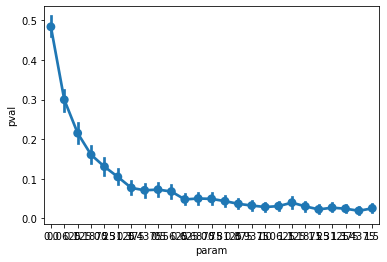

In [26]:
ax = sns.pointplot(data=maha, x="param", y="pval")
# sns.pointplot(data=null_scores, x="param", y="mean")

In [21]:
null_scores.plot("perm_scores")

ValueError: x must be a label or position

In [22]:
samplesize = pd.read_pickle("simulate_samplesize.pkl")

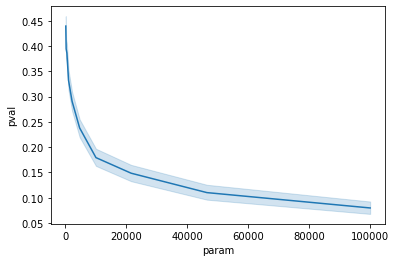

In [24]:
ax = sns.lineplot(data=samplesize, x="param", y="pval")